In [1]:
# Scikit-learn (sklearn) : python 프로그래밍 언어용 기계학습 (Machine Learning) 관련 라이브러리
from sklearn.metrics import classification_report, confusion_matrix

# sklearn.model_selection : 클래스를 나눌 때, 함수를 통해 train/test를 나눌때
# train_test_split : 임의의 훈련 및 테스트 하위 집합으로 분할
from sklearn.model_selection import train_test_split

# sklearn.tree : 분류 및 회귀를 위한 의사결정 트리 기반 모델이 있는 서브 패키지
# DecisionTreeClassfier : 의사결정 트리 분류 모듈
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus
import os

In [2]:
tennis_data = pd.read_csv('play_tennis.csv')
tennis_data

,Outlook,Humidity,Wind,PlayTennis
0,Sunny,High,Weak,No
1,Sunny,High,Strong,No
2,Overcast,High,Weak,Yes
3,Rain,High,Weak,Yes
4,Rain,Normal,Strong,Yes
5,Rain,Normal,Strong,No
6,Overcast,Normal,Weak,Yes
7,Sunny,High,Weak,No
8,Sunny,Normal,Weak,Yes
9,Rain,High,Weak,No


In [3]:
# 데이터값 수치화
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny', 0)
tennis_data.Outlook = tennis_data.Outlook.replace('Overcast', 1)
tennis_data.Outlook = tennis_data.Outlook.replace('Rain', 2)

tennis_data.Humidity = tennis_data.Humidity.replace('High', 1)
tennis_data.Humidity = tennis_data.Humidity.replace('Normal', 2)

tennis_data.Wind = tennis_data.Wind.replace('Weak', 1)
tennis_data.Wind = tennis_data.Wind.replace('Strong', 2)

tennis_data.PlayTennis = tennis_data.PlayTennis.replace('No', 1)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace('Yes', 2)

tennis_data

,Outlook,Humidity,Wind,PlayTennis
0,0,1,1,1
1,0,1,2,1
2,1,1,1,2
3,2,1,1,2
4,2,2,2,2
5,2,2,2,1
6,1,2,1,2
7,0,1,1,1
8,0,2,1,2
9,2,1,1,1


In [4]:
# 조건과 결과 테이블 나누기
X = np.array(pd.DataFrame(tennis_data, columns = ['Outlook', 'Humidity', 'Wind']))
y = np.array(pd.DataFrame(tennis_data, columns = ['PlayTennis']))

In [5]:
# 훈련 및 테스트 분류
#X_train, X_test, y_train, y_test = train_test_split(X,y)


X_train = X[0:14]
X_test = X[14:]
y_train = y[0:14]
y_test = y[14:]

In [6]:
X_train

array([[0, 1, 1],
       [0, 1, 2],
       [1, 1, 1],
       [2, 1, 1],
       [2, 2, 2],
       [2, 2, 2],
       [1, 2, 1],
       [0, 1, 1],
       [0, 2, 1],
       [2, 1, 1],
       [0, 2, 2],
       [1, 1, 1],
       [1, 2, 1],
       [2, 1, 2]], dtype=int64)

In [7]:
y_train

array([[1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1]], dtype=int64)

In [8]:
# train 모델로 의사결정트리 만듦(지니계수 알아서 만듦)
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
os.pathsep
os.environ['PATH']+='c:/ai/program/graphviz/bin/;'
os.environ['PATH']

'C:\\ai\\python\\anaconda3;C:\\ai\\python\\anaconda3\\Library\\mingw-w64\\bin;C:\\ai\\python\\anaconda3\\Library\\usr\\bin;C:\\ai\\python\\anaconda3\\Library\\bin;C:\\ai\\python\\anaconda3\\Scripts;C:\\ai\\python\\anaconda3\\bin;C:\\ai\\python\\anaconda3\\condabin;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0\\;C:\\Windows\\System32\\OpenSSH\\;C:\\Program Files\\Java\\jdk1.8.0_231\\bin;C:\\java\\apache-maven-3.6.2\\bin;C:\\java\\apache-tomcat-9.0.27\\bin;C:\\Program Files\\Git\\cmd;C:\\Users\\student\\AppData\\Local\\Programs\\Python\\Python38-32\\Scripts\\;C:\\Users\\student\\AppData\\Local\\Programs\\Python\\Python38-32\\;C:\\Ruby26-x64\\bin;C:\\Users\\student\\AppData\\Local\\Microsoft\\WindowsApps;C:\\Users\\student\\AppData\\Local\\Programs\\Microsoft VS Code\\bin;C:\\Program Files\\Bandizip\\;C:\\Users\\student\\AppData\\Local\\GitHubDesktop\\bin;C:\\Progra

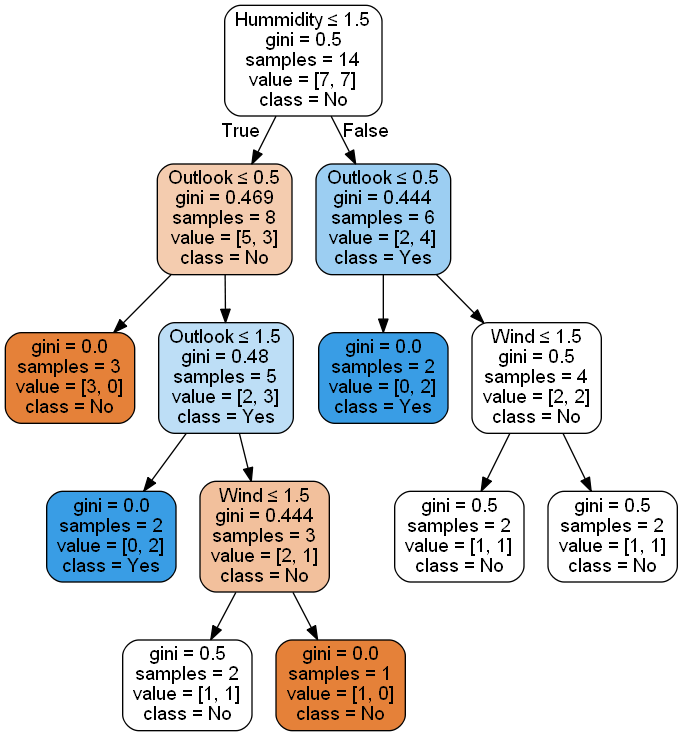

In [10]:
# 만들어진 의사결정트리로 트리그림 만들기
dt_dot_data = tree.export_graphviz(dt_clf,
                                    out_file=None, #파일 또는 문자열로 변환 (None : 문자열)
                                    feature_names = ['Outlook', 'Hummidity', 'Wind'], 
                                    class_names = ['No', 'Yes'], 
                                    filled = True, #색 채우기
                                    rounded = True, #둥근 모서리
                                    special_characters = True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())

In [11]:
X_test

array([[2, 1, 1],
       [1, 2, 2],
       [0, 1, 1]], dtype=int64)

In [12]:
# 새로운 데이터로 예측해보기
new_data = np.array(
[
    [0,1,2],
    [1,2,1]
])

dt_clf.predict(new_data)

array([1, 1], dtype=int64)

In [13]:
# X_test로 예측하기
dt_prediction = dt_clf.predict(X_test)
dt_prediction

array([1, 1, 1], dtype=int64)

In [14]:
# 진짜
y_test

array([[1],
       [2],
       [1]], dtype=int64)

In [15]:
# 실제와 예측이 얼마나 다른지 표로 확인
#                 예측
#              no      yes
# 실제  no     2        0
#       yes    1        2
confusion_matrix(y_test, dt_prediction)

array([[2, 0],
       [1, 0]], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, dt_prediction)
print('정확도:', accuracy)

정확도: 0.6666666666666666
